<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Sixth_Day_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Happiness Report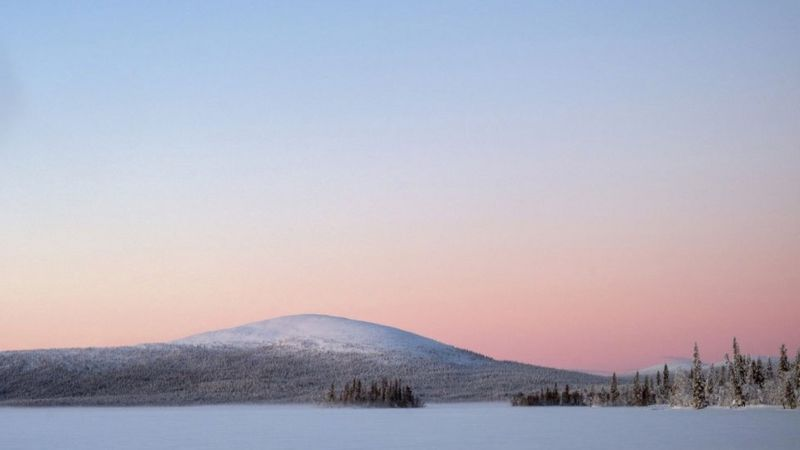

##Context
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

##Content
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

###ID : unique id for every player
###Name : name of the player
###Age : age of the player
###Nationality : nationality
###Flag : url to players's country flag
###Overall : overall rating 
###Potential : potential rating
###Club: current club

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
pip install country_converter

In [ ]:
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import plotly.graph_objects as go
import country_converter as coco
from plotly.subplots import make_subplots
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


##Data Preparation and Cleaning
###Load the file using Pandas
###Look at some information about the data & the columns
###Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021"
od.download(path)

Skipping, found downloaded files in "./world-happiness-report-2021" (use force=True to force download)


In [ ]:
path_c= "./world-happiness-report-2021"
os.listdir(path_c)

['world-happiness-report.csv', 'world-happiness-report-2021.csv']

In [ ]:
# Read the files  # ['world-happiness-report.csv', 'world-happiness-report-2021.csv']

data=pd.read_csv(path_c+"/world-happiness-report.csv")  # data before 2021
data_2021= pd.read_csv(path_c + "/world-happiness-report-2021.csv") # data in 2021

#Tuple of data 
couple_data=(data,data_2021)

In [ ]:
for i in couple_data:
  print("-"*100)
  print(f"The size of data is {i.shape}")
  print("*"*80)
  print(i.head())

----------------------------------------------------------------------------------------------------
The size of data is (1949, 11)
********************************************************************************
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                       

In [ ]:
# types of data
print(f"the type of data  is \n{data.dtypes}")
print("-"*100)
print(f"the type of data_2021  is \n{data_2021.dtypes}")

the type of data  is 
Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object
----------------------------------------------------------------------------------------------------
the type of data_2021  is 
Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita       

##Data Cleaning 

###First data : data

In [ ]:
#stats before 2021
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


* Ladder score: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* Logged GDP per capita: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* Social support: Social support refers to assistance or support provided by members of social networks to an individual.
* Healthy life expectancy: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* Freedom to make life choices: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* Generosity: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* Ladder score in Dystopia: It has values equal to the world’s lowest national averages.
* Perceptions of corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* Ladder score in Dystopia: It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

In [ ]:
#duplicate rows 
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape[0])
if duplicate_rows_data.shape[0] !=0:
  print(duplicate_rows_data)

number of duplicate rows:  0


In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
data.count()

Country name                        1949
year                                1949
Life Ladder                         1949
Log GDP per capita                  1913
Social support                      1936
Healthy life expectancy at birth    1894
Freedom to make life choices        1917
Generosity                          1860
Perceptions of corruption           1839
Positive affect                     1927
Negative affect                     1933
dtype: int64

In [ ]:
#Missing values 
print(data.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [ ]:
data[data["Log GDP per capita"].isnull()].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
436,Cyprus,2020,6.260,NaN,0.806,74.10,0.763,NaN,0.816,0.759,0.284
709,Hong Kong S.A.R. of China,2020,5.295,NaN,0.813,NaN,0.705,NaN,0.380,0.609,0.210
771,Iran,2018,4.278,NaN,0.674,66.00,0.603,NaN,0.703,0.553,0.493
772,Iran,2019,5.006,NaN,0.698,66.30,0.623,NaN,0.728,0.600,0.449


* not found informations for these countries
* it's okay , in fact , these country suffered from wars , poverty and famine 
* we can keep this data , this cannot affect to our analysis

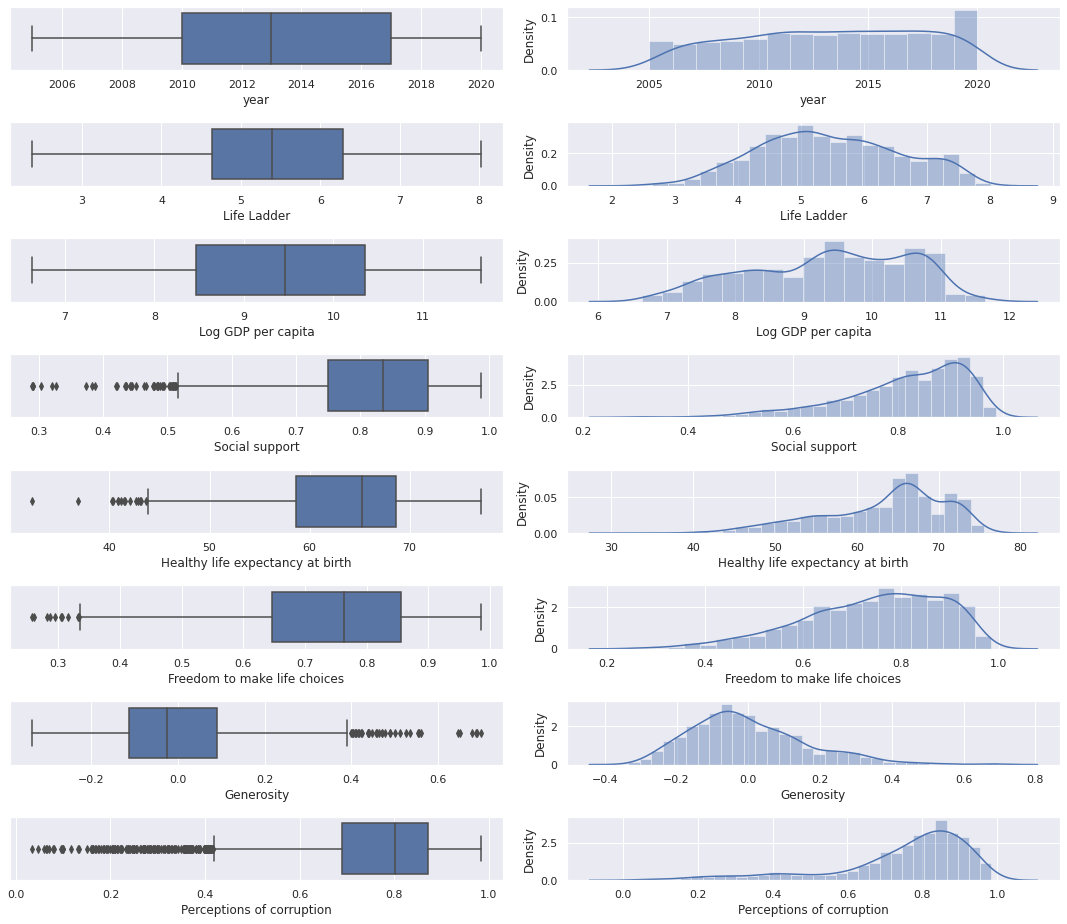

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(8, 2, figsize = (15, 13))
sns.boxplot(x= data["year"], ax = ax[0,0])
sns.distplot(data['year'], ax = ax[0,1])
sns.boxplot(x= data["Life Ladder"], ax = ax[1,0])
sns.distplot(data['Life Ladder'], ax = ax[1,1])
sns.boxplot(x= data["Log GDP per capita"], ax = ax[2,0])   			 
sns.distplot(data['Log GDP per capita'], ax = ax[2,1])
sns.boxplot(x= data["Social support"], ax = ax[3,0])
sns.distplot(data['Social support'], ax = ax[3,1])
sns.boxplot(x= data["Healthy life expectancy at birth"], ax = ax[4,0])
sns.distplot(data["Healthy life expectancy at birth"], ax = ax[4,1])
sns.boxplot(x= data["Freedom to make life choices"], ax = ax[5,0])
sns.distplot(data['Freedom to make life choices'], ax = ax[5,1])
sns.boxplot(x= data["Generosity"], ax = ax[6,0])
sns.distplot(data['Generosity'], ax = ax[6,1])
sns.boxplot(x= data["Perceptions of corruption"], ax = ax[7,0])
sns.distplot(data['Perceptions of corruption'], ax = ax[7,1])
plt.tight_layout()

###Second data : data_2021

In [ ]:
data_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
#duplicate rows 
duplicate_rows_data_2021 = data_2021[data_2021.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_2021.shape[0])
if duplicate_rows_data_2021.shape[0] !=0:
  print(duplicate_rows_data_2021)

number of duplicate rows:  0


In [ ]:
data_2021.count()

Country name                                  149
Regional indicator                            149
Ladder score                                  149
Standard error of ladder score                149
upperwhisker                                  149
lowerwhisker                                  149
Logged GDP per capita                         149
Social support                                149
Healthy life expectancy                       149
Freedom to make life choices                  149
Generosity                                    149
Perceptions of corruption                     149
Ladder score in Dystopia                      149
Explained by: Log GDP per capita              149
Explained by: Social support                  149
Explained by: Healthy life expectancy         149
Explained by: Freedom to make life choices    149
Explained by: Generosity                      149
Explained by: Perceptions of corruption       149
Dystopia + residual                           149


In [ ]:
#Missing values 
print(data_2021.isnull().sum())

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


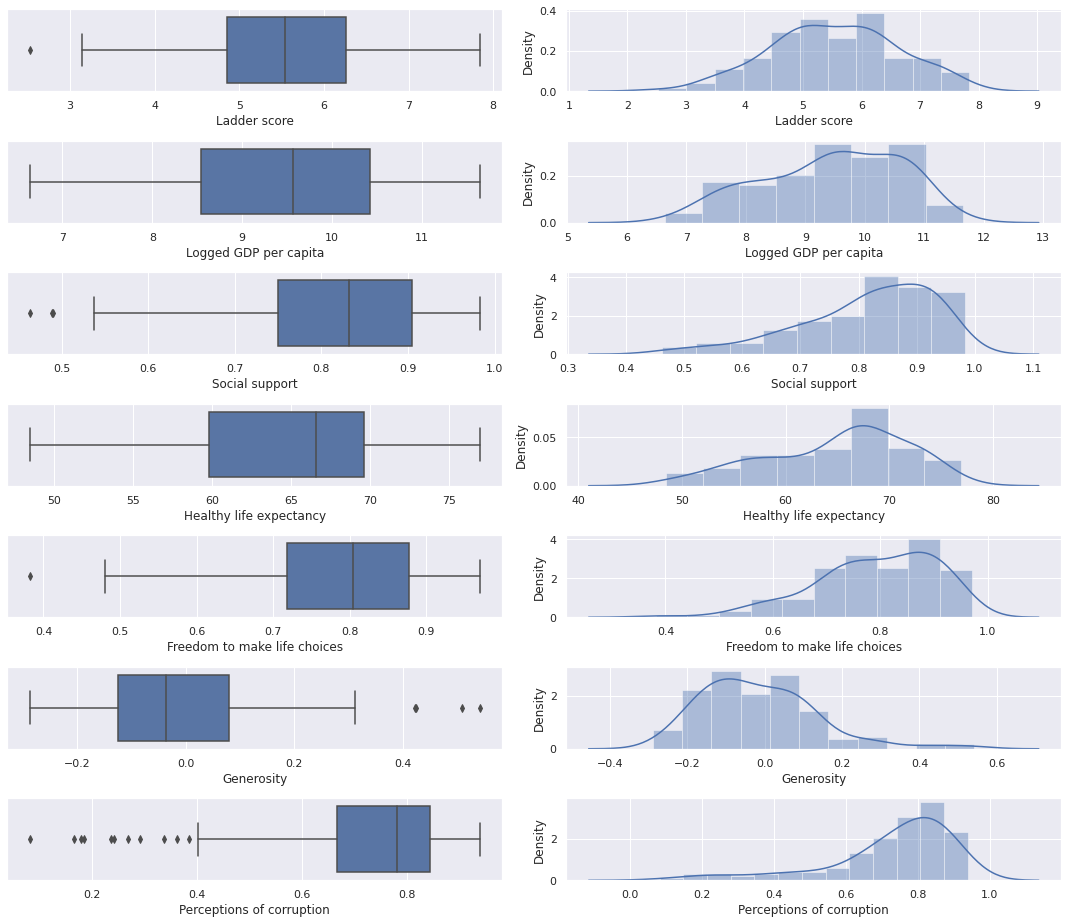

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(7, 2, figsize = (15, 13))
sns.boxplot(x= data_2021["Ladder score"], ax = ax[0,0])
sns.distplot(data_2021['Ladder score'], ax = ax[0,1])
sns.boxplot(x= data_2021["Logged GDP per capita"], ax = ax[1,0])   			 
sns.distplot(data_2021['Logged GDP per capita'], ax = ax[1,1])
sns.boxplot(x= data_2021["Social support"], ax = ax[2,0])
sns.distplot(data_2021['Social support'], ax = ax[2,1])
sns.boxplot(x= data_2021["Healthy life expectancy"], ax = ax[3,0])
sns.distplot(data_2021["Healthy life expectancy"], ax = ax[3,1])
sns.boxplot(x= data_2021["Freedom to make life choices"], ax = ax[4,0])
sns.distplot(data_2021['Freedom to make life choices'], ax = ax[4,1])
sns.boxplot(x= data_2021["Generosity"], ax = ax[5,0])
sns.distplot(data_2021['Generosity'], ax = ax[5,1])
sns.boxplot(x= data_2021["Perceptions of corruption"], ax = ax[6,0])
sns.distplot(data_2021['Perceptions of corruption'], ax = ax[6,1])
plt.tight_layout()

##Data analysis : data before 2021

###Question 1 : Ladder Score Distribution by Countries in Map View


In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
fig = px.choropleth(data.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

###Question 2 : Generous Distribution by Countries in Map View

In [ ]:
fig = px.choropleth(data.sort_values("year"),
                   locations = "Country name",
                   color = "Generosity",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Generosity Comparison by Countries")
fig.show()

###Question 3 : Life Ladder and Log GDP per capita Comparison by Countries for each Year(Relationship Between Happiness and Income)

In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


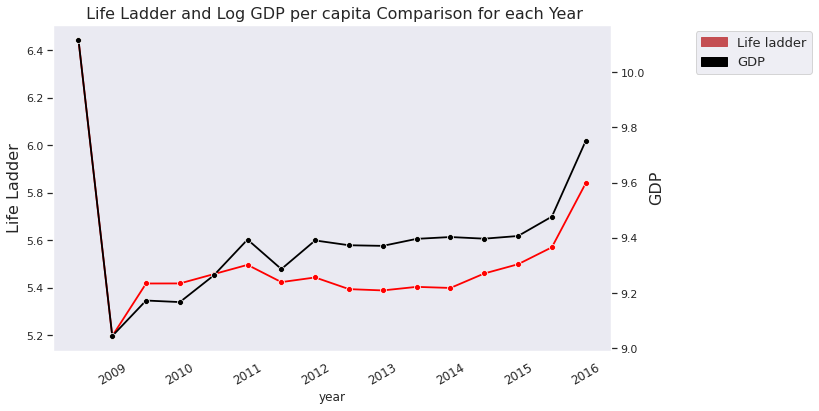

In [ ]:
#life ladder and GDP by year 
# viz 
fig, ax1 = plt.subplots(figsize=(10, 6))

#bar plot of rating by product line 
ax1 = sns.lineplot(x="year", y='Life Ladder', data = data, color = 'red', marker='o', lw=1.8,ci=None)
ax1.set_title(' Life Ladder and Log GDP per capita Comparison for each Year', fontsize = 16)
ax1.set_ylabel('Life Ladder', fontsize=16)
ax1.set_xticklabels(data["year"], fontsize=12)
ax1.tick_params(axis='x', rotation = 30)
ax1.tick_params(axis='y')
#line plot of unit prices by product line
ax3 = ax1.twinx()
ax3.set_ylabel('GDP',  fontsize = 16)
ax3 = sns.lineplot(x = "year", y= "Log GDP per capita", data=data, color = 'black', marker='o', lw=1.8,ci=None)
ax3.tick_params(axis='y')
ax1.grid(False)
ax3.grid(False)

#to set the legend
from matplotlib import patches as mpatches
life_ladder = mpatches.Patch(color='r')
gdp = mpatches.Patch(color='black')

name = ['Life ladder', 'GDP']
ax1.legend(labels=name,handles=[life_ladder, gdp],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
plt.show()

In [ ]:
#life ladder and GDP for each country by year 
data['Country name'].unique()
# let's check some countries
country_list=['Afghanistan','Belgium','Brazil','China','Denmark','Turkey','Nigeria','Senegal','Saudi Arabia','Tunisia']
def life_ladder_by_country(country):
  df=data[data['Country name']==country]
  #life ladder and GDP by year 
  fig, ax1 = plt.subplots(figsize=(10, 6))
  #bar plot of rating by product line 
  ax1 = sns.lineplot(x="year", y='Life Ladder', data = df, color = 'red', marker='o', lw=1.8,ci=None)
  ax1.set_title(f' Life Ladder and Log GDP per capita Comparison in {country}', fontsize = 16)
  ax1.set_ylabel('Life Ladder', fontsize=16)
  ax1.set_xticklabels(df["year"], fontsize=12)
  ax1.tick_params(axis='x', rotation = 30)
  ax1.tick_params(axis='y')
  #line plot of unit prices by product line
  ax3 = ax1.twinx()
  ax3.set_ylabel('GDP',  fontsize = 16)
  ax3 = sns.lineplot(x = "year", y= "Log GDP per capita", data=df, color = 'black', marker='o', lw=1.8,ci=None)
  ax3.tick_params(axis='y')
  ax1.grid(False)
  ax3.grid(False)

  #to set the legend
  from matplotlib import patches as mpatches
  life_ladder = mpatches.Patch(color='r')
  gdp = mpatches.Patch(color='black')

  name = ['Life ladder', 'GDP']
  ax1.legend(labels=name,handles=[life_ladder, gdp],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
  plt.show()

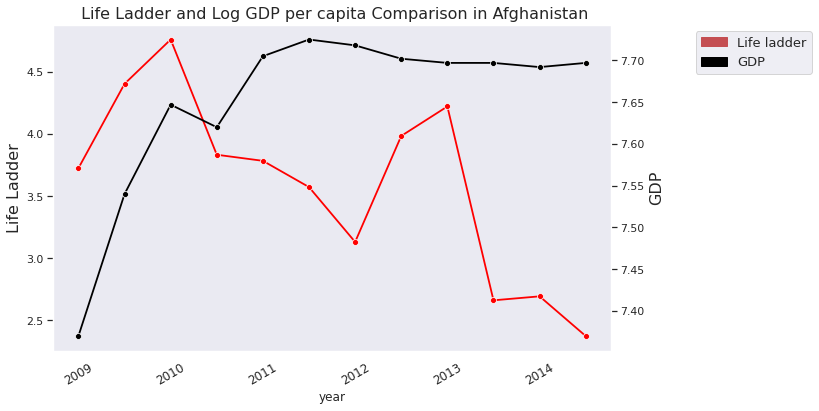

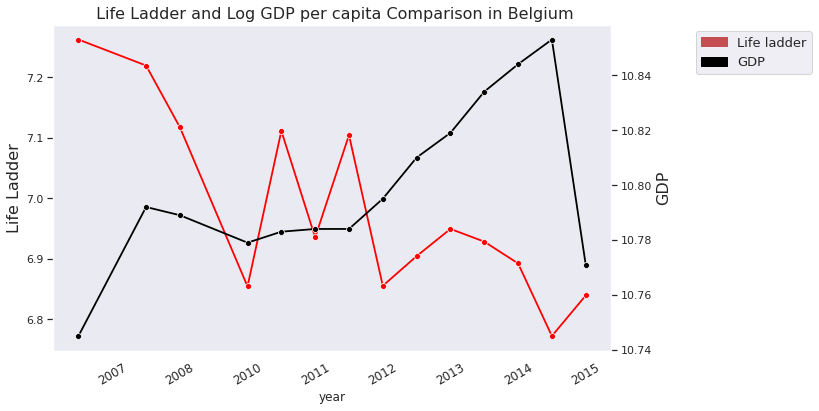

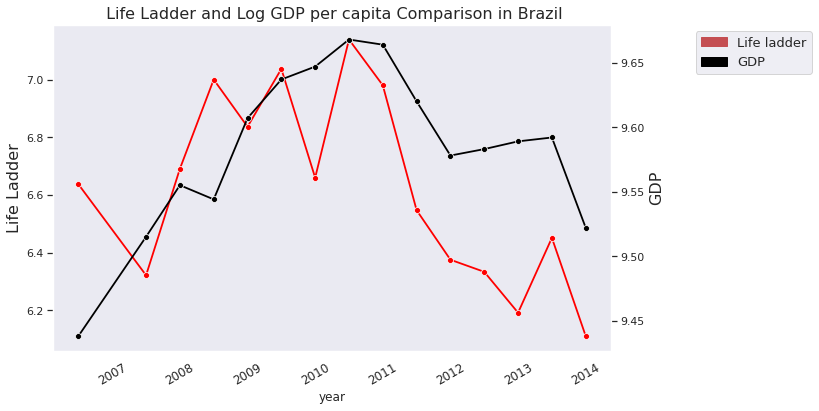

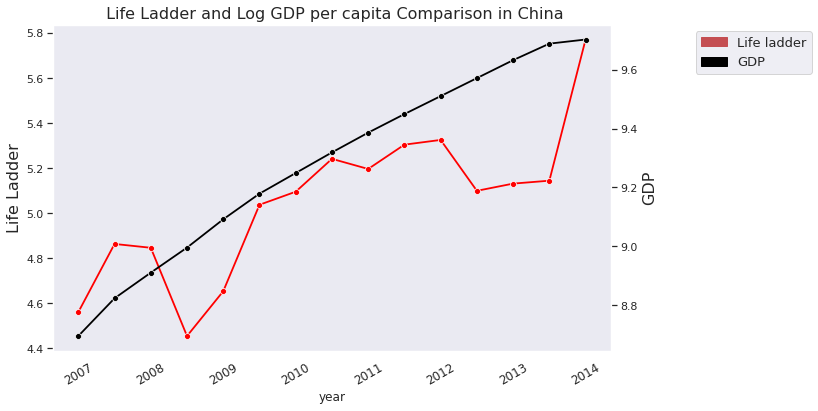

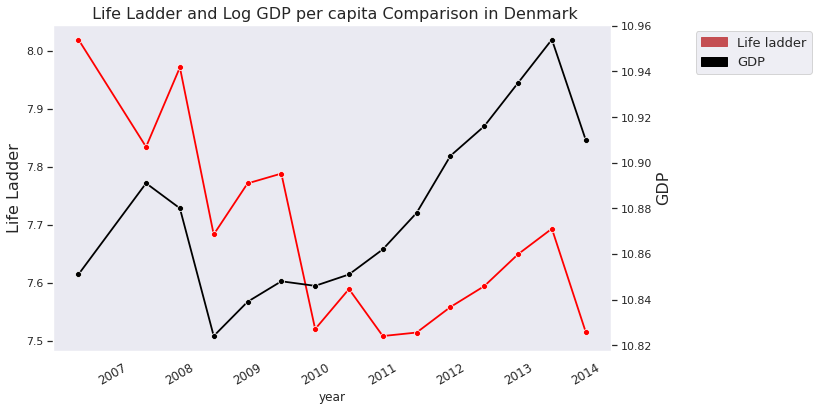

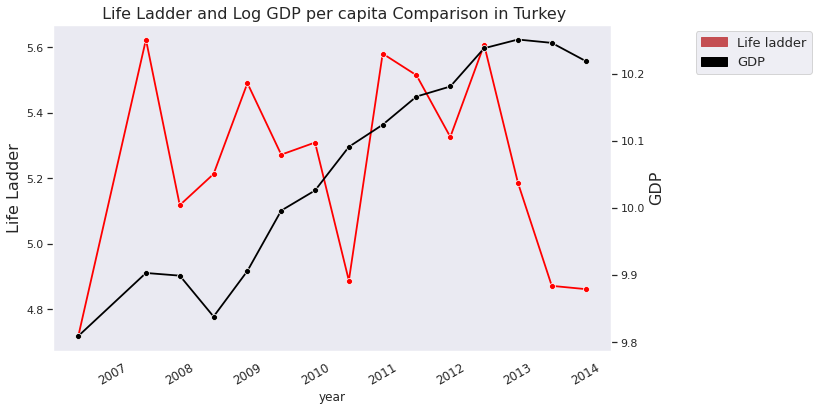

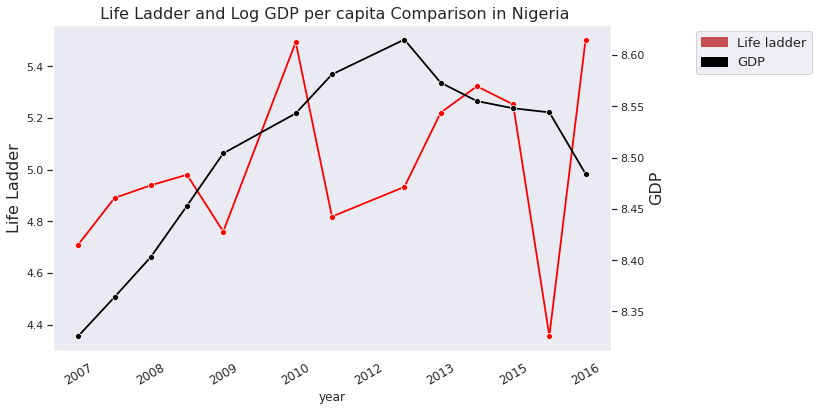

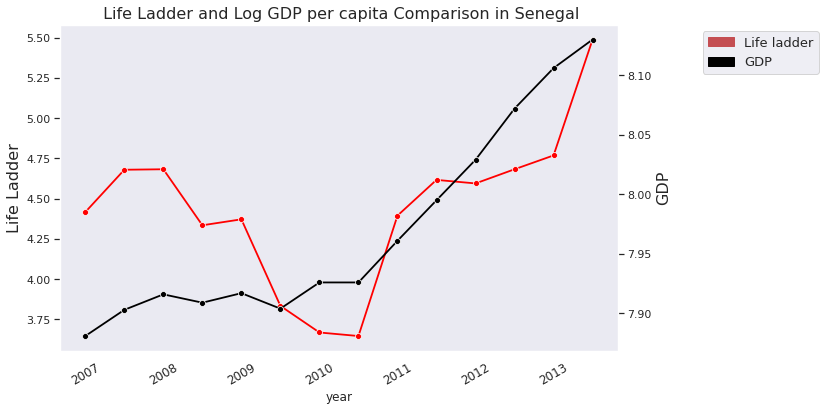

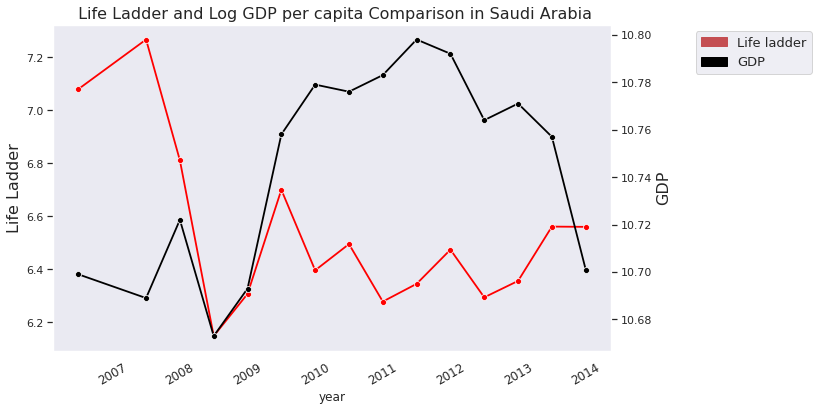

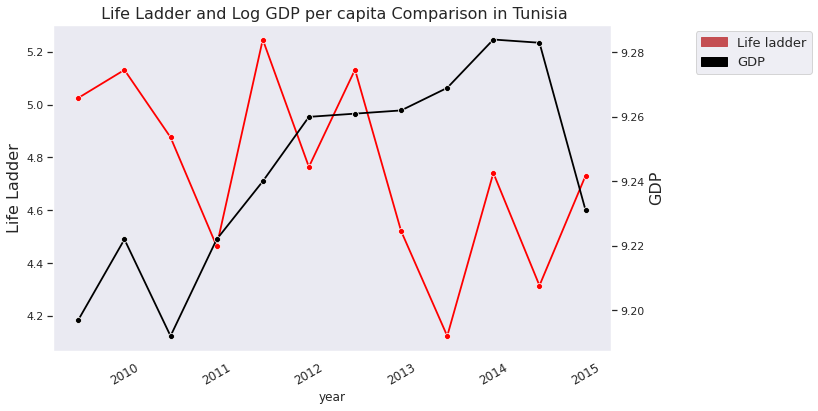

In [ ]:
# Viz for each country
for t in country_list:
  life_ladder_by_country(t)

* We see for  arabi saudi that the life ladder and the gdp is negatively related , that's why the life ladder is related with others features like freedom that is  less than 1  in Saudi 
* In Tunisia , there's no relation , this country is completely different of others countries .After the revolution in 2011 , people got more freedom but less income 

###Question 4 : Life Ladder and Freedom Comparison by Countries via Regions for each Year (Relationship Between Happiness and Freedom)

In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


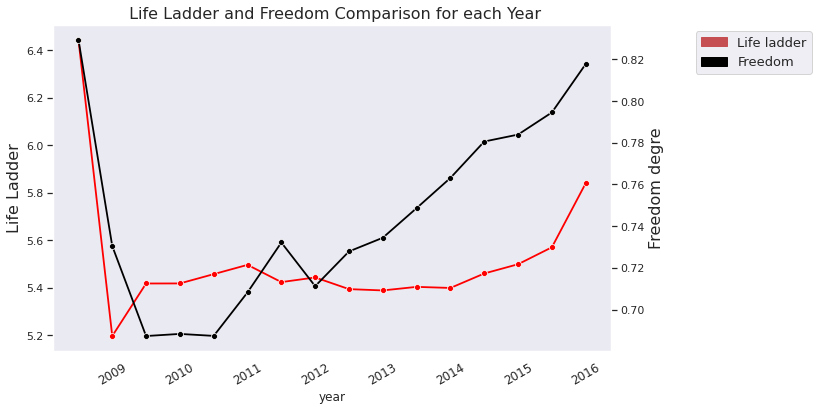

In [ ]:
#life ladder and Freedom by year 
# viz 
fig, ax1 = plt.subplots(figsize=(10, 6))

#bar plot of rating by product line 
ax1 = sns.lineplot(x="year", y='Life Ladder', data = data, color = 'red', marker='o', lw=1.8,ci=None)
ax1.set_title(' Life Ladder and Freedom Comparison for each Year', fontsize = 16)
ax1.set_ylabel('Life Ladder', fontsize=16)
ax1.set_xticklabels(data["year"], fontsize=12)
ax1.tick_params(axis='x', rotation = 30)
ax1.tick_params(axis='y')
#line plot of unit prices by product line
ax3 = ax1.twinx()
ax3.set_ylabel('Freedom degre',  fontsize = 16)
ax3 = sns.lineplot(x = "year", y= "Freedom to make life choices", data=data, color = 'black', marker='o', lw=1.8,ci=None)
ax3.tick_params(axis='y')
ax1.grid(False)
ax3.grid(False)

#to set the legend
from matplotlib import patches as mpatches
life_ladder = mpatches.Patch(color='r')
free = mpatches.Patch(color='black')

name = ['Life ladder', 'Freedom']
ax1.legend(labels=name,handles=[life_ladder, free],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
plt.show()

In [ ]:
# let's check some countries
country_list_0=['Afghanistan','France','Belgium','Brazil','China','Denmark','Turkey','Nigeria','Senegal','Saudi Arabia','Tunisia']
def freedom_by_country(country):
  df=data[data['Country name']==country]
  #life ladder and GDP by year 
  fig, ax1 = plt.subplots(figsize=(10, 6))
  #bar plot of rating by product line 
  ax1 = sns.lineplot(x="year", y='Life Ladder', data = df, color = 'red', marker='o', lw=1.8,ci=None)
  ax1.set_title(f' Life Ladder and Freedom per capita Comparison in {country}', fontsize = 16)
  ax1.set_ylabel('Life Ladder', fontsize=16)
  ax1.set_xticklabels(df["year"], fontsize=12)
  ax1.tick_params(axis='x', rotation = 30)
  ax1.tick_params(axis='y')
  #line plot of unit prices by product line
  ax3 = ax1.twinx()
  ax3.set_ylabel('Freedom',  fontsize = 16)
  ax3 = sns.lineplot(x = "year", y= "Freedom to make life choices", data=df, color = 'black', marker='o', lw=1.8,ci=None)
  ax3.tick_params(axis='y')
  ax1.grid(False)
  ax3.grid(False)

  #to set the legend
  from matplotlib import patches as mpatches
  life_ladder = mpatches.Patch(color='r')
  free = mpatches.Patch(color='black')

  name = ['Life ladder', 'Freedom']
  ax1.legend(labels=name,handles=[life_ladder, free],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
  plt.show()

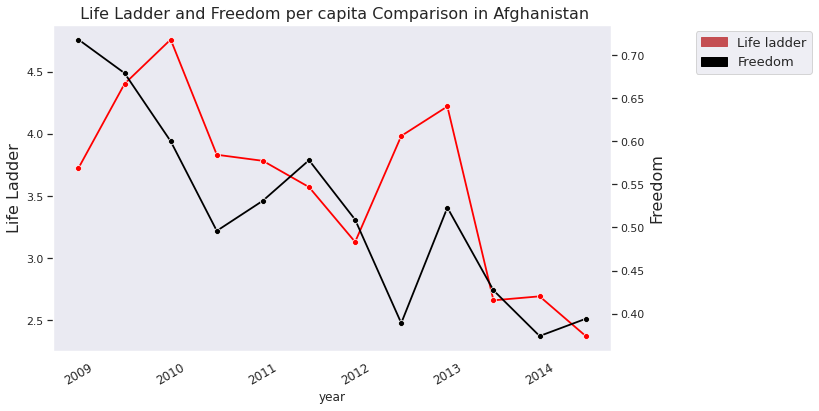

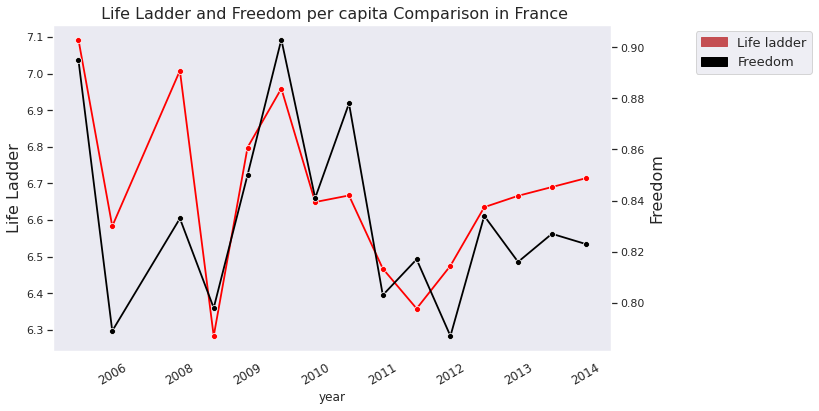

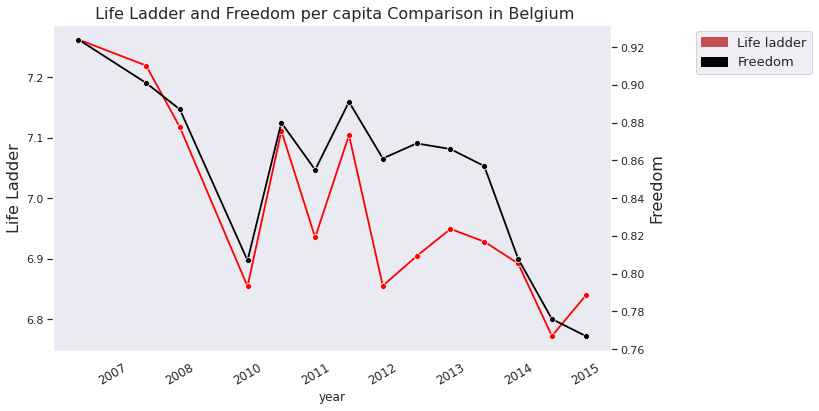

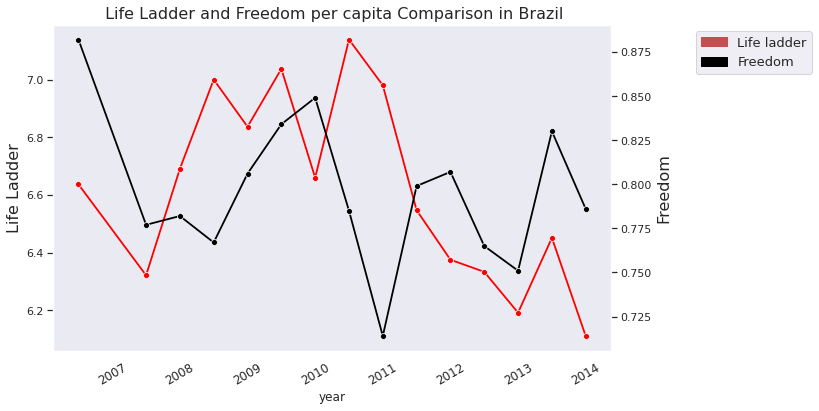

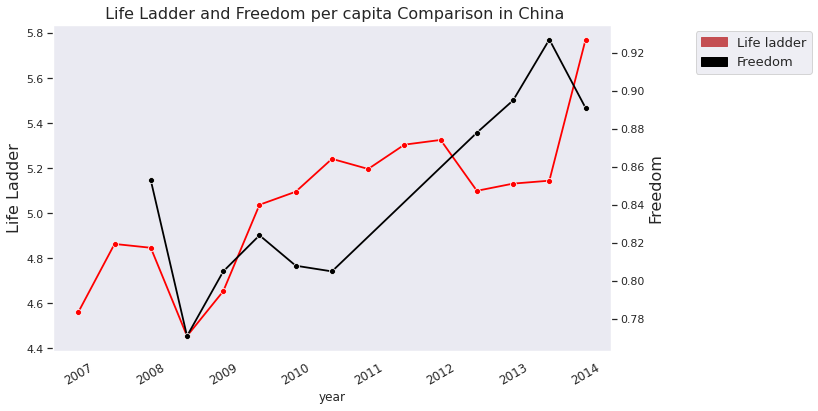

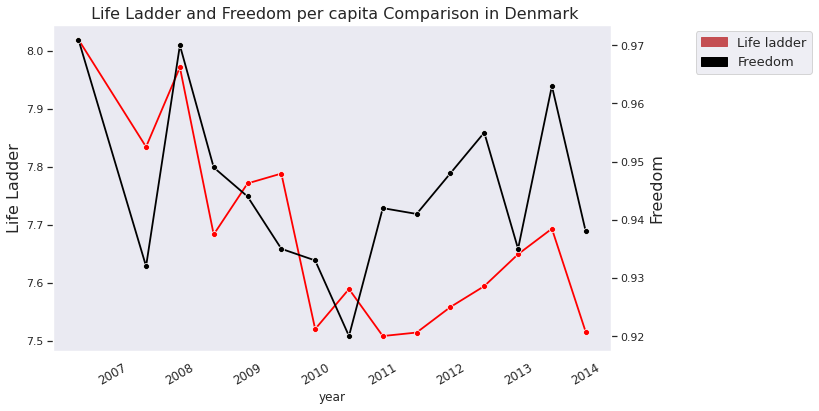

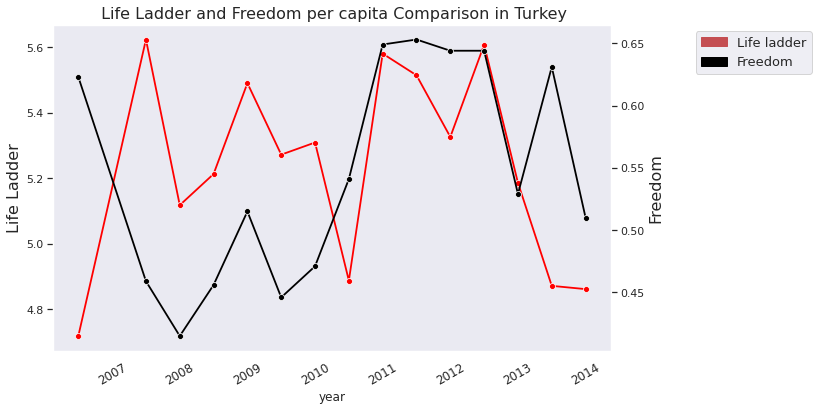

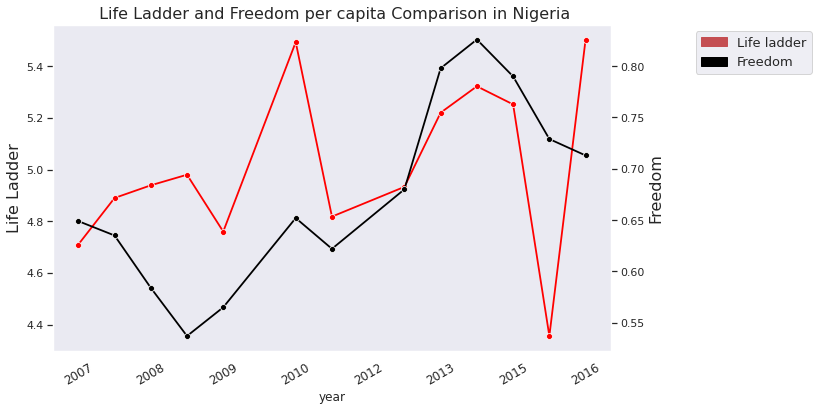

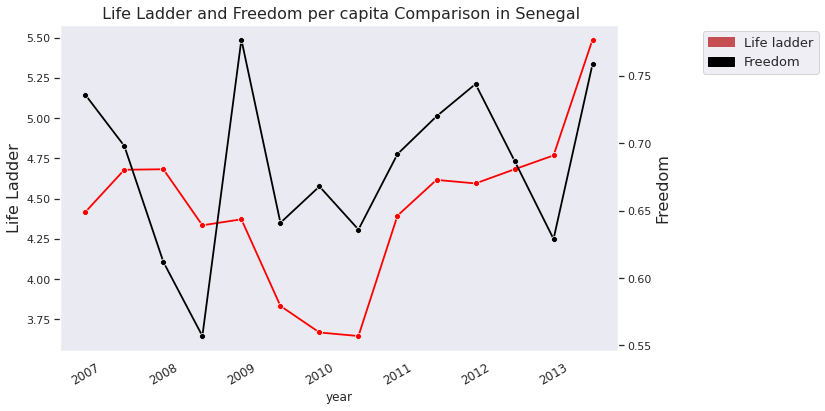

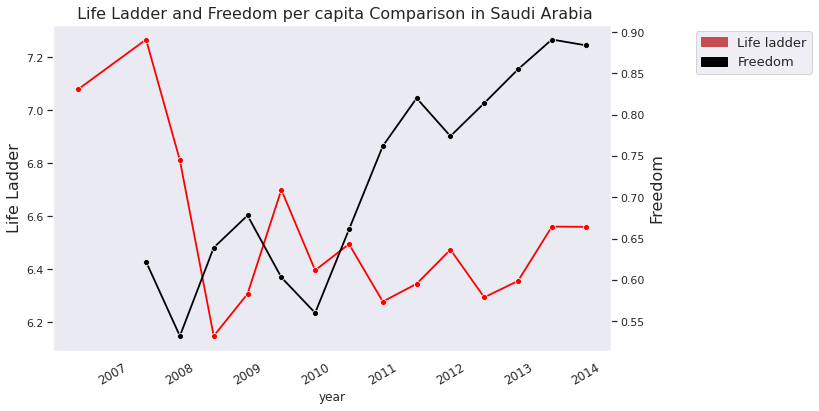

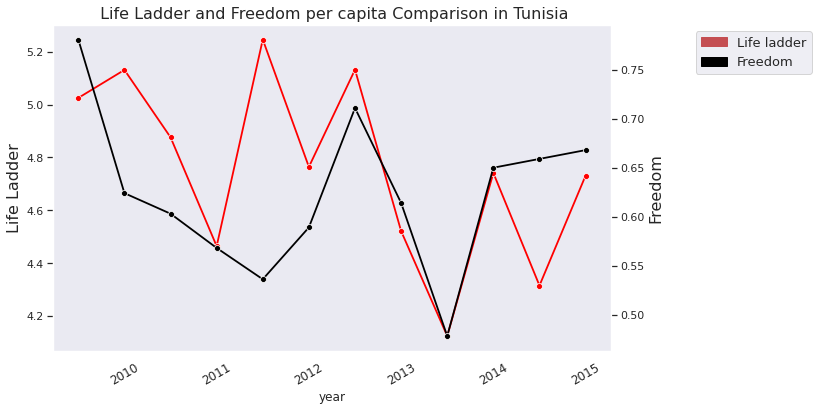

In [ ]:
for t in country_list_0:
  freedom_by_country(t)

* In Tunisia , there is a positive relation 
*  Freedom is important because it leads to enhanced expressions of creativity and original thought, increased productivity, and an overall high quality of life.

###Question 5 : Life Ladder and Corruption Comparison by Countries via Regions for each Year (Relationship Between Happiness and Corruption)


In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


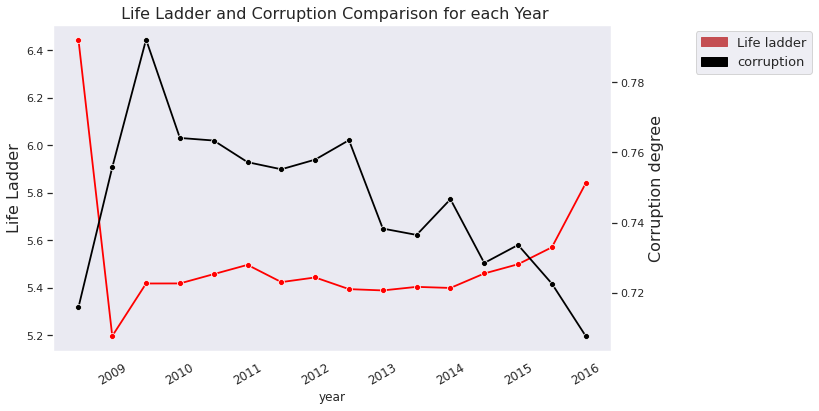

In [ ]:
#life ladder and corruption by year 
# viz 
fig, ax1 = plt.subplots(figsize=(10, 6))

#bar plot of rating by product line 
ax1 = sns.lineplot(x="year", y='Life Ladder', data = data, color = 'red', marker='o', lw=1.8,ci=None)
ax1.set_title(' Life Ladder and Corruption Comparison for each Year', fontsize = 16)
ax1.set_ylabel('Life Ladder', fontsize=16)
ax1.set_xticklabels(data["year"], fontsize=12)
ax1.tick_params(axis='x', rotation = 30)
ax1.tick_params(axis='y')
#line plot of unit prices by product line
ax3 = ax1.twinx()
ax3.set_ylabel('Corruption degree',  fontsize = 16)
ax3 = sns.lineplot(x = "year", y= "Perceptions of corruption", data=data, color = 'black', marker='o', lw=1.8,ci=None)
ax3.tick_params(axis='y')
ax1.grid(False)
ax3.grid(False)

#to set the legend
from matplotlib import patches as mpatches
life_ladder = mpatches.Patch(color='r')
free = mpatches.Patch(color='black')

name = ['Life ladder', 'corruption']
ax1.legend(labels=name,handles=[life_ladder, free],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
plt.show()

* In a nutshell, corruption increases inequality, decreases popular accountability and political responsiveness, and thus produces rising frustration and hardship among citizens, who are then more likely to accept (or even demand) hard-handed and illiberal tactics.

In [ ]:

# let's check some countries
country_list_0=['Afghanistan','France','Belgium','Brazil','Denmark','Turkey','Nigeria','Senegal','Saudi Arabia','Tunisia']
def corruption_by_country(country):
  df=data[data['Country name']==country]
  #life ladder and GDP by year 
  fig, ax1 = plt.subplots(figsize=(10, 6))

  #bar plot of rating by product line 
  ax1 = sns.lineplot(x="year", y='Life Ladder', data = df, color = 'red', marker='o', lw=1.8,ci=None)
  ax1.set_title(f' Life Ladder and Corruption Comparison for {country}', fontsize = 16)
  ax1.set_ylabel('Life Ladder', fontsize=16)
  ax1.set_xticklabels(data["year"], fontsize=12)
  ax1.tick_params(axis='x', rotation = 30)
  ax1.tick_params(axis='y')
  #line plot of unit prices by product line
  ax3 = ax1.twinx()
  ax3.set_ylabel('Corruption degree',  fontsize = 16)
  ax3 = sns.lineplot(x = "year", y= "Perceptions of corruption", data=df, color = 'black', marker='o', lw=1.8,ci=None)
  ax3.tick_params(axis='y')
  ax1.grid(False)
  ax3.grid(False)

  #to set the legend
  from matplotlib import patches as mpatches
  life_ladder = mpatches.Patch(color='r')
  free = mpatches.Patch(color='black')

  name = ['Life ladder', 'corruption']
  ax1.legend(labels=name,handles=[life_ladder, free],  loc="upper left", bbox_to_anchor=(1.14, 1), fontsize=13)
  plt.show()

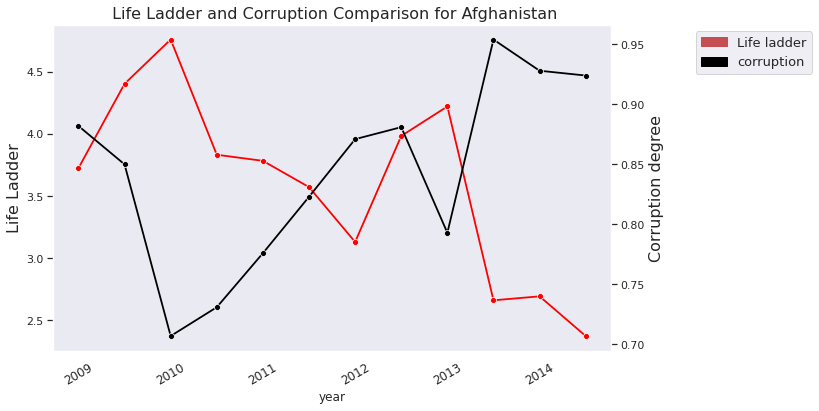

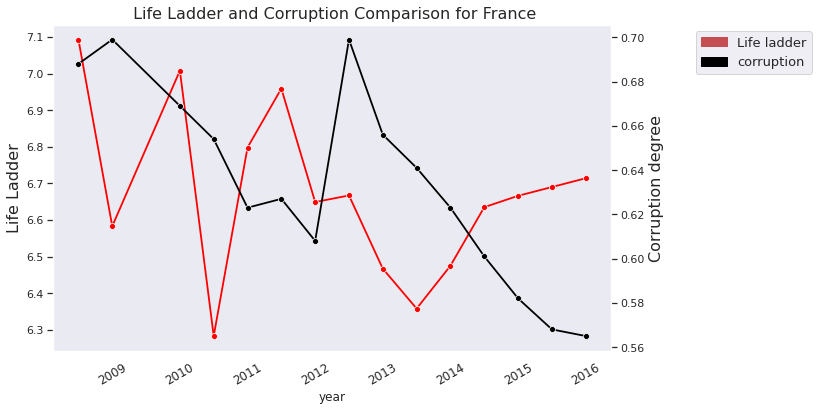

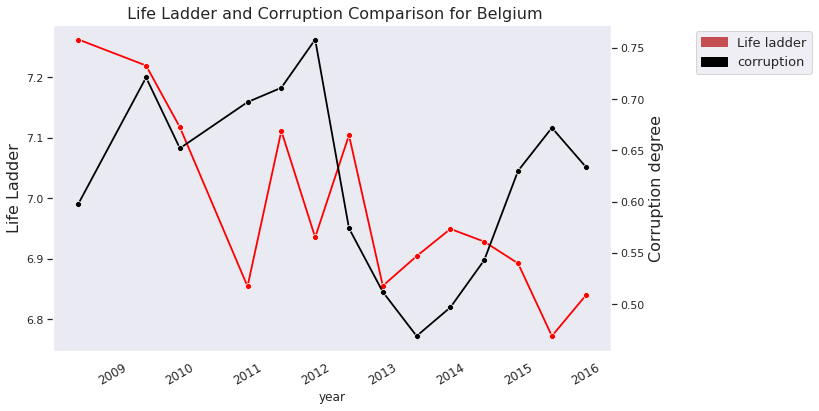

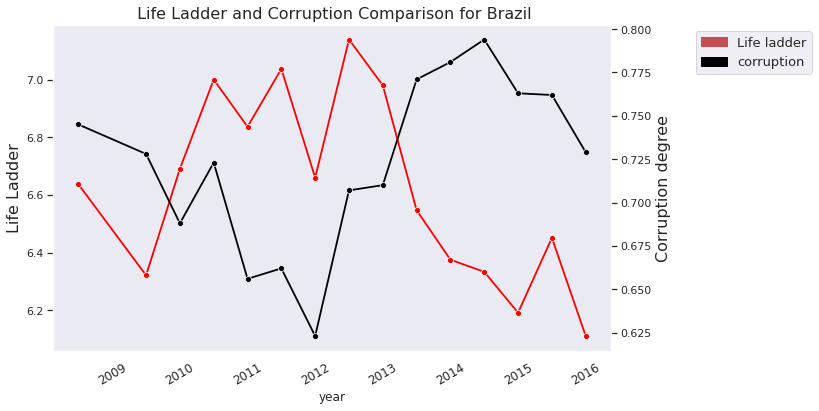

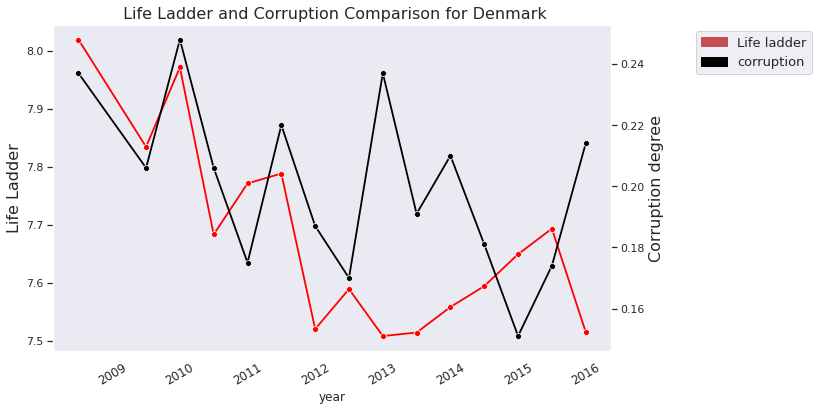

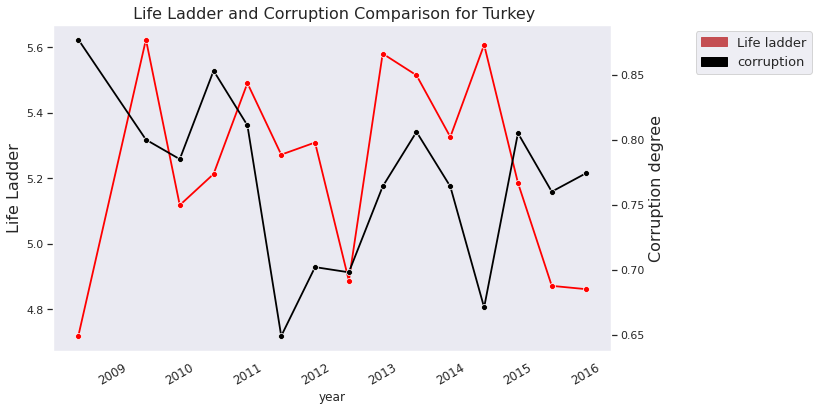

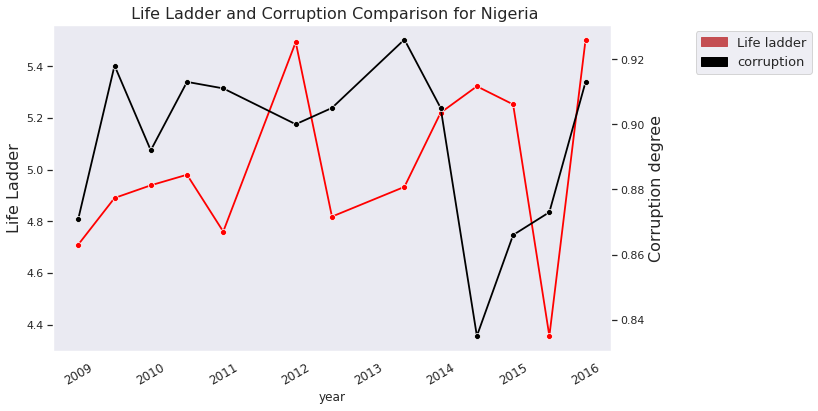

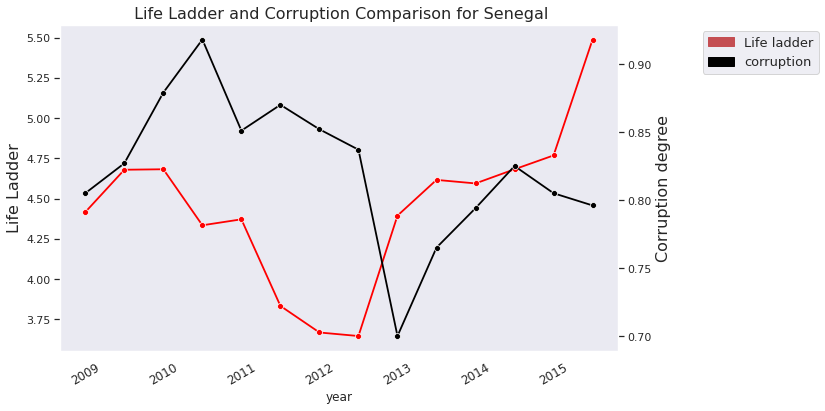

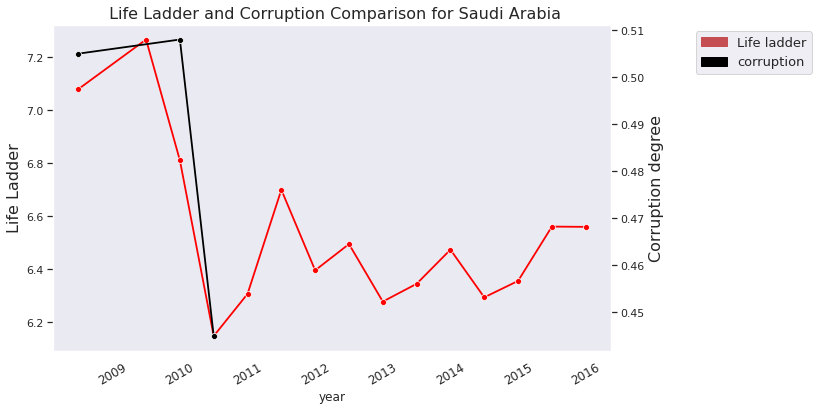

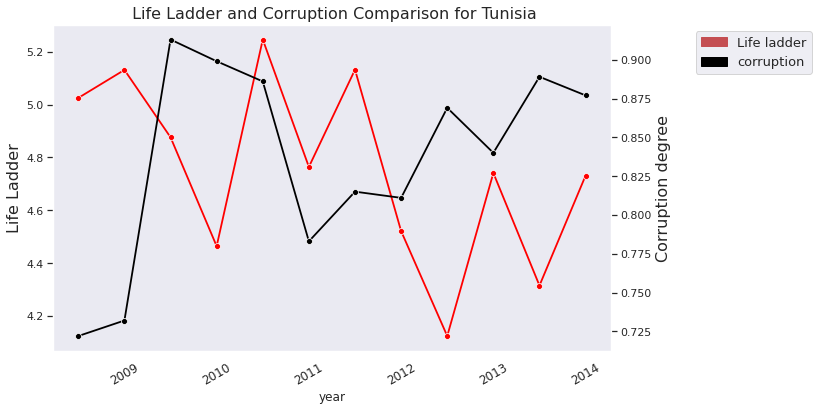

In [ ]:
for t in country_list_0:
  corruption_by_country(t)

###Question 8 : Relationship Between Features 

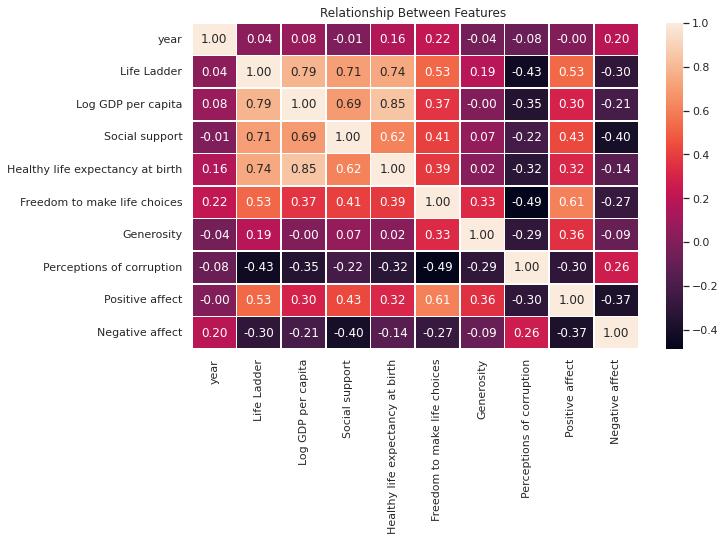

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1=sns.heatmap(data.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

##Data analysis : data in 2021

###Question 1 : Data Distributions in 2021

In [ ]:
data_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


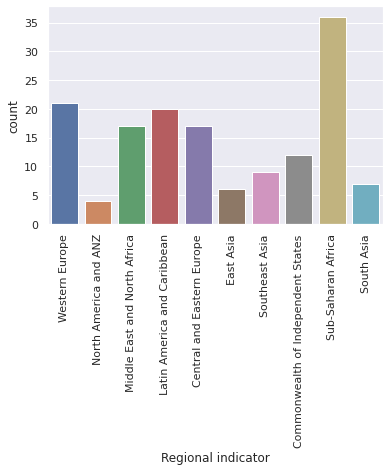

In [ ]:
# count regional indicator
sns.countplot(data_2021["Regional indicator"])
plt.xticks(rotation = 90)
plt.show()

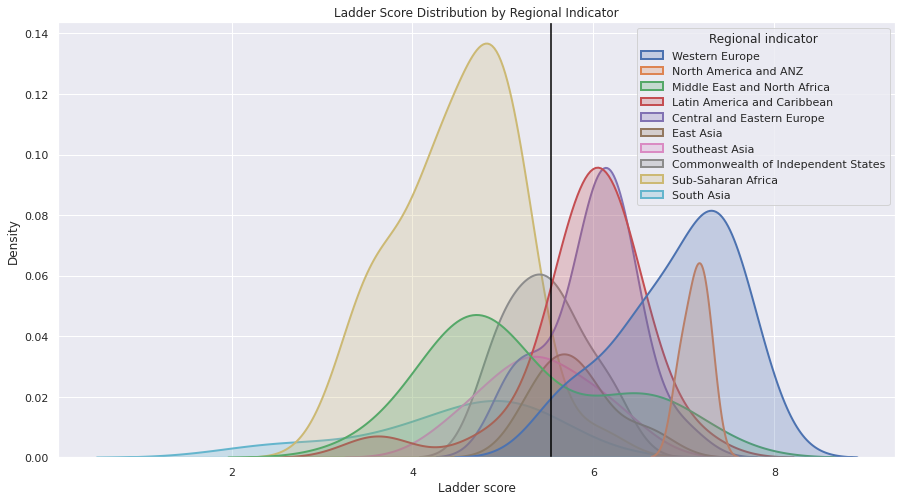

In [ ]:
#Ladder Score Distribution by Regional Indicator
plt.figure(figsize = (15,8))
sns.kdeplot(data_2021["Ladder score"], hue = data_2021["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(data_2021["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

###Question 2 : Happiest and Unhappiest Countries in 2021

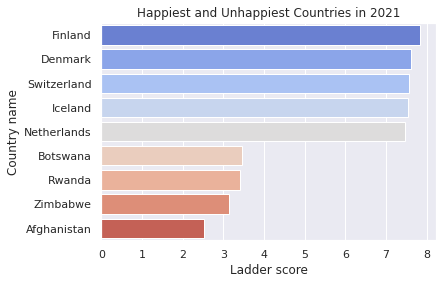

In [ ]:
happy_2021 = data_2021[(data_2021.loc[:, "Ladder score"] > 7.4) | (data_2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=happy_2021, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

###Question 3 : Most Generous and Most Ungenerous Countries in 2021

In [ ]:
data_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


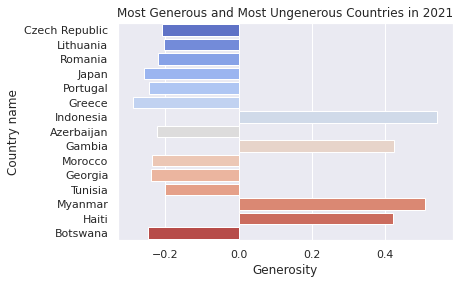

In [ ]:
dtt = data_2021[(data_2021["Generosity"] > 0.4) | (data_2021["Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y = "Country name", data = dtt, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()

###Question 4 : Generous Distribution by Regional Indicator in 2021

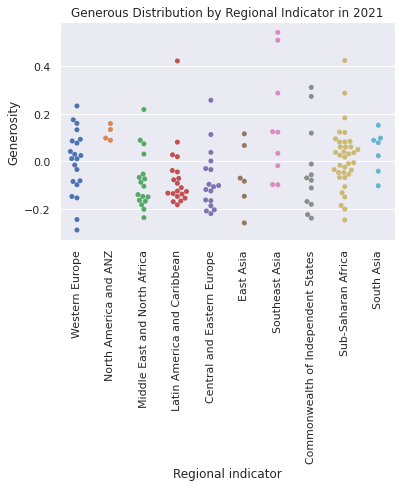

In [ ]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = data_2021)
plt.xticks(rotation = 90)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

##Conclution 



* The Happinest County is Finland.
* The Unhappinest Country is Afghanistan
* The happinest region is West Europe
* The unhappinest region is East Asia
* Rigth proportion Log DGP per capita with Life Ladder
* As incresing rate of corruption, Life Ladder rate is decreasing

In [ ]:
 # ! End .